--TensorFlow tutorial for CS224D


In [1]:
import tensorflow as tf
print "start...."
#create constant,a*b,sum,shape,reshape

#set a default session.
sess=tf.InteractiveSession() 
sess.as_default()
a=tf.zeros((2,2));b=tf.ones((2,2))

dot_result=tf.matmul(a,b) #.eval()
print "dot_result:",dot_result

print "a:",a,"b:",b
sum=tf.reduce_sum(b,reduction_indices=1).eval() #np.sum(a, axis=1)
print "sum:",sum

a_shape=a.get_shape() #a.shape()
print "a_shape:",a_shape 

a2=tf.reshape(a,(1,4)).eval() #np.reshape
print "a2.shape:",a2.shape,"a2:",a2
print "end..."

start....
dot_result: Tensor("MatMul:0", shape=(2, 2), dtype=float32)
a: Tensor("zeros:0", shape=(2, 2), dtype=float32) b: Tensor("ones:0", shape=(2, 2), dtype=float32)
sum: [ 2.  2.]
a_shape: (2, 2)
a2.shape: (1, 4) a2: [[ 0.  0.  0.  0.]]
end...


In [15]:
#Session
print "start...."
a=tf.constant(5.0)
b=tf.constant(6.0)
c=a*b
with tf.Session() as sess:
    print sess.run(c) # equals to c.eval()
    print c.eval()
print "end..."

 start....
30.0
30.0
end...


In [20]:
#Variables
print "start...."
W1=tf.ones((2,2))
W2=tf.Variable(tf.zeros((2,2)),name="weights")
with tf.Session() as sess:
    print "W1:",sess.run(W1) 
    sess.run(tf.initialize_all_variables()) #init variables before run it.
    print "W2:",sess.run(W2)
print "end..."

 start....
W1: [[ 1.  1.]
 [ 1.  1.]]
W2: [[ 0.  0.]
 [ 0.  0.]]
end...


In [6]:
#example of something like 'counter'
print "start..."
state=tf.Variable(0,name="counter") #state=0. declare a variable 'counter'
new_value=tf.add(state,tf.constant(1)) #new_value=state+1. add 'counter' with 1 to get a new value
update=tf.assign(state,new_value) #update=new_value
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print "state.before add:",sess.run(state) 
    for _ in range(4):
        sess.run(update) #state=state+1
        print "state:",sess.run(state)
print "end..."

start...
state.before add: 0
state: 1
state: 2
state: 3
state: 4
end...


In [7]:
#Fetching Variable State
print "start..."
input1=tf.constant(3.0)
input2=tf.constant(2.0)
input3=tf.constant(5.0)
intermed=tf.add(input2,input3)
mul=tf.mul(intermed,input1)
with tf.Session() as sess:
    print "variables:",sess.run([intermed,mul])
print "end..."

start...
variables: [7.0, 21.0]
end...


In [8]:
#Input Data
import numpy as np
a=np.zeros((3,3)) #a is a numpy array
ta=tf.convert_to_tensor(a) #convert numpy array to tensor
with tf.Session() as sess:
    print "ta:",sess.run(ta)

ta: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [34]:
#PlaceHoders: dummy variable just act as place holder
input1=tf.placeholder(tf.float32)
input2=tf.placeholder(tf.float32)
output=tf.mul(input1,input2)
with tf.Session() as sess:
    print "output:",sess.run([output],feed_dict={input1:[7.],input2:[2.]}) #feed_dict to set value for input1 and input2. then calcuate output.


output: [array([ 14.], dtype=float32)]


In [12]:
#Variable Scope
print "start..."
with tf.variable_scope("foo"): #,reuse=True
    with tf.variable_scope("bar"): #,reuse=True
        v=tf.get_variable("v",[1])
assert v.name=="foo/bar/v:0"
print "end..."

start...
end...


In [50]:
#Vraible Scope: reuse variables1
print "start..."
with tf.variable_scope("foo"):
    v=tf.get_variable("v",[1]) #get one variable named "v"
    tf.get_variable_scope().reuse_variables() #set variable reuse strategy
    v1=tf.get_variable("v",[1]) #get "v" again. since we set variable reuse strategy. it will get same variables
assert v1==v
print "end..."

start...
end...


In [56]:
#Vraible Scope: reuse variables
print "start..."
with tf.variable_scope("foo"):
    w=tf.get_variable("w",[1])
    
with tf.variable_scope("foo",reuse=True):
    w=tf.get_variable("w",[1])
    w1=tf.get_variable("w",[1])
assert w==w1
print "end..."

start...
end...


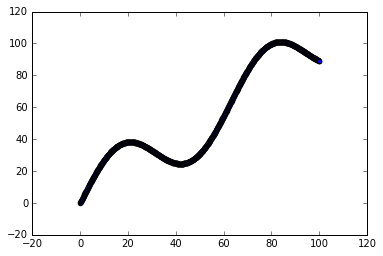

In [17]:
#Linear Regression in TensorFlow.1:Prepare training data(X,y)
import numpy as np
#import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
#Define input data
X_data=np.arange(100,step=.1)
y_data=X_data+20*np.sin(X_data/10)

#plot input data
plt.scatter(X_data,y_data)

In [64]:
#Linear Regression in TensorFlow.2.Define input for batch operation later.
n_samples=1000
batch_size=100

X_data=tf.reshape(X_data,(n_samples,1)) #source dataset
y_data=tf.reshape(y_data,(n_samples,1)) #source label
X_data = tf.cast(X_data, tf.float32)
y_data = tf.cast(y_data, tf.float32)

#Define placeholders for input
X=tf.placeholder(tf.float32,shape=(batch_size,1)) #for batch use
y=tf.placeholder(tf.float32,shape=(batch_size,1)) #for batch use

In [66]:
#Linear Regression in TensorFlow.3.Predict and compute Loss
#Define variables to be learned
print "start...."
with tf.variable_scope("linear-regression10"):
    tf.get_variable_scope().reuse_variables()
    W=tf.get_variable("weights",(1,1),initializer=tf.random_normal_initializer(),dtype=tf.float32)
    b=tf.get_variable("bias",(1,),initializer=tf.constant_initializer(0.0),dtype=tf.float32)
    y_pred=tf.matmul(X_data,W)+b  #TypeError: Input 'b' of 'MatMul' Op has type float32 that does not match type float64 of argument 'a'.  
    loss=tf.reduce_sum((y_pred-y)**2)/n_samples #np.sum((y_pred-y)**2)/n_samples
print "end..."

start....
end...


In [ ]:
#Linear Regression in TensorFlow.4.Optimization: one step
#Sample code to run 'one step' of gradient descent
print "start..."
opt=tf.train.AdamOptimizer()
opt_operation=opt.minimize(loss) ##loss = tf.cast(loss, tf.float32)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables()) 
    #TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, or numpy ndarrays.
    #ValueError: Shape (1000, 1) must have rank 1
    sess.run([opt_operation],feed_dict={X:X_data,y:y_data})
print "end..."

In [78]:
#Linear Regression in TensorFlow.4.Optimization
#Sample code to run 'full' gradient descent
print "start..."
batch_size=100
opt_operation=tf.train.AdamOptimizer().minimize(loss) #use adam(a SGD) to minize loss
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    #Gradient descent loop for 500 steps
    for _ in range(500):
        indices=np.random.choice(n_samples,batch_size)  #1.select random minibatch
        #indices_t=tf.convert_to_tensor(indices)
        X_batch,y_batch=X_data[indices_t,:],y_data[indices_t,:]
        print "X_batch:",X_batch.eval()
        _,loss_val=sess.run([opt_operation],feed_dict={X:X_batch,y:y_batch}) #2.run mini-batch adam(a SGD)update
        print "loss:",loss
#TypeError: Bad slice index Tensor("Const_6:0", shape=(100,), dtype=int64) of 
#type <class 'tensorflow.python.framework.ops.Tensor'>
print "end..."

start...


TypeError: Bad slice index Tensor("Const_10:0", shape=(100,), dtype=int64) of type <class 'tensorflow.python.framework.ops.Tensor'>

In [82]:
#Below is Optional Part. you can ignore it if you are in a hurry
#Sofmtax in numpy
import numpy as np
def softmax(x):
  """
  Compute the softmax function in tensorflow.

  You might find the tensorflow functions tf.exp, tf.reduce_max,
  tf.reduce_sum, tf.expand_dims useful. (Many solutions are possible, so you may
  not need to use all of these functions). Recall also that many common
  tensorflow operations are sugared (e.g. x * y does a tensor multiplication
  if x and y are both tensors). Make sure to implement the numerical stability
  fixes as in the previous homework!

  Args:
    x:   tf.Tensor with shape (n_samples, n_features). Note feature vectors are
         represented by row-vectors. (For simplicity, no need to handle 1-d
         input as in the previous homework)
  Returns:
    out: tf.Tensor with shape (n_sample, n_features). You need to construct this
         tensor in this problem.
  """

  ### YOUR CODE HERE
  max_eachrow=np.max(x,axis=1,keepdims=True)
  x=x-max_eachrow
  probs=np.exp(x)
  sum_eachrow=np.sum(probs,axis=1,keepdims=True)
  probs=probs/sum_eachrow
  out=probs
  ### END YOUR CODE
  
  return out 
x=np.random.randn(5,3)*100+10
print "x:",x
x_=softmax(x)
print "x_:",x_

x: [[-126.36969415 -111.04573566   79.00518716]
 [  59.8617107    66.79666063   76.64539713]
 [  41.27882623   78.11916296 -151.69552089]
 [ -40.12372603   69.69516752  187.48213565]
 [-129.57801748   14.87440946   48.5348157 ]]
x_: [[  6.40947302e-090   2.89689622e-083   1.00000000e+000]
 [  5.13942622e-008   5.28110890e-005   9.99947138e-001]
 [  1.00102529e-016   1.00000000e+000   1.55865840e-100]
 [  1.41915627e-099   7.01083423e-052   1.00000000e+000]
 [  4.43179225e-078   2.40697350e-015   1.00000000e+000]]


In [4]:
#Sofmtax in TensorFlow
import numpy as np
import tensorflow as tf
def softmax(x):
  """
  Compute the softmax function in tensorflow.

  You might find the tensorflow functions tf.exp, tf.reduce_max,
  tf.reduce_sum, tf.expand_dims useful. (Many solutions are possible, so you may
  not need to use all of these functions). Recall also that many common
  tensorflow operations are sugared (e.g. x * y does a tensor multiplication
  if x and y are both tensors). Make sure to implement the numerical stability
  fixes as in the previous homework!

  Args:
    x:   tf.Tensor with shape (n_samples, n_features). Note feature vectors are
         represented by row-vectors. (For simplicity, no need to handle 1-d
         input as in the previous homework)
  Returns:
    out: tf.Tensor with shape (n_sample, n_features). You need to construct this
         tensor in this problem.
  """
  ### YOUR CODE HERE 
  max_eachrow=tf.reduce_max(x,reduction_indices=[1]) #max_eachrow=np.max(x,axis=1,keepdims=True)
  max_eachrow_=tf.expand_dims(max_eachrow,1)                    
  x=x-max_eachrow_ #a2=tf.reshape(a,(1,4)).eval()
  probs=tf.exp(x) #probs=np.exp(x)
  sum_eachrow=tf.reduce_sum(probs,reduction_indices=[1]) #sum_eachrow=np.sum(probs,axis=1,keepdims=True)
  sum_eachrow=tf.expand_dims(sum_eachrow,1)
  probs=probs/sum_eachrow
  out=probs
  ### END YOUR CODE 
  return out 

x=np.random.randn(5,3)*100+10
x2=tf.convert_to_tensor(x)
print "x:",x
sess=tf.InteractiveSession()
sess.as_default()
x_=softmax(x2)
print "x_:",x_.eval()

x2=tf.nn.softmax(x2)
print "x2:",x2.eval()

x: [[ -86.30383715   24.90825023   21.66614383]
 [ -16.43482024  216.30176755  168.78351547]
 [  10.49246979  -28.63764785  -21.50471918]
 [ 183.73201432   41.06096441  108.0535273 ]
 [ 212.41481792   61.87556623  106.43011386]]
x_: [[  4.83675984e-049   9.62388429e-001   3.76115712e-002]
 [  8.39042939e-102   1.00000000e+000   2.30720048e-021]
 [  1.00000000e+000   1.01392501e-017   1.26998150e-014]
 [  1.00000000e+000   1.09332756e-062   1.35909774e-033]
 [  1.00000000e+000   4.18440471e-066   9.36327675e-047]]
x2: [[  4.83675984e-049   9.62388429e-001   3.76115712e-002]
 [  8.39042939e-102   1.00000000e+000   2.30720048e-021]
 [  1.00000000e+000   1.01392501e-017   1.26998150e-014]
 [  1.00000000e+000   1.09332756e-062   1.35909774e-033]
 [  1.00000000e+000   4.18440471e-066   9.36327675e-047]]


In [11]:
#cross entropy loss using basic function of tensorflow.
def cross_entropy_loss(y, yhat):
  """
  Compute the cross entropy loss in tensorflow.

  y is a one-hot tensor of shape (n_samples, n_classes) and yhat is a tensor
  of shape (n_samples, n_classes). y should be of dtype tf.int32, and yhat should
  be of dtype tf.float32.

  The functions tf.to_float, tf.reduce_sum, and tf.log might prove useful. (Many
  solutions are possible, so you may not need to use all of these functions).

  Note: You are NOT allowed to use the tensorflow built-in cross-entropy
        functions.

  Args:
    y:    tf.Tensor with shape (n_samples, n_classes). One-hot encoded.
    yhat: tf.Tensorwith shape (n_sample, n_classes). Each row encodes a
          probability distribution and should sum to 1.
  Returns:
    out:  tf.Tensor with shape (1,) (Scalar output). You need to construct this
          tensor in the problem.
  """
  ### YOUR CODE HERE
  y=tf.to_float(y)
  yhat=tf.to_float(yhat)
  #1.get log of yhat
  yhat_log=tf.log(yhat)
  #2.multiply 
  mul=-1.0*tf.mul(y,yhat_log)
  out=tf.reduce_sum(mul)
  ### END YOUR CODE
  return out

#test the function
sess=tf.InteractiveSession()
sess.as_default()
#tf.get_variable_scope().reuse_variables()
y=tf.get_variable("y",(5,1),initializer=tf.random_normal_initializer(),dtype=tf.float32 )
yhat=tf.get_variable("yhat",(5,1),initializer=tf.random_normal_initializer(),dtype=tf.float32 )
sess.run(tf.initialize_all_variables())
print "y:",y.eval()
print "yhat:",yhat.eval()
cross_entropy_loss(y, yhat)

Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f2a7f030ad0>> ignored


ValueError: Under-sharing: Variable y does not exist, disallowed. Did you mean to set reuse=None in VarScope?

In [12]:
def test_softmax_basic():
  """
  Some simple tests to get you started. 
  Warning: these are not exhaustive.
  """
  print "Running basic tests..."
  test1 = softmax(tf.convert_to_tensor(
      np.array([[1001,1002],[3,4]]), dtype=tf.float32))
  with tf.Session():
      test1 = test1.eval()
  assert np.amax(np.fabs(test1 - np.array(
      [0.26894142,  0.73105858]))) <= 1e-6

  test2 = softmax(tf.convert_to_tensor(
      np.array([[-1001,-1002]]), dtype=tf.float32))
  with tf.Session():
      test2 = test2.eval()
  assert np.amax(np.fabs(test2 - np.array(
      [0.73105858, 0.26894142]))) <= 1e-6

  print "Basic (non-exhaustive) softmax tests pass\n"

def test_cross_entropy_loss_basic():
  """
  Some simple tests to get you started.
  Warning: these are not exhaustive.
  """
  y = np.array([[0, 1], [1, 0], [1, 0]])
  yhat = np.array([[.5, .5], [.5, .5], [.5, .5]])

  test1 = cross_entropy_loss(
      tf.convert_to_tensor(y, dtype=tf.int32),
      tf.convert_to_tensor(yhat, dtype=tf.float32))
  with tf.Session():
    test1 = test1.eval()
  result = -3 * np.log(.5)
  assert np.amax(np.fabs(test1 - result)) <= 1e-6
  print "Basic (non-exhaustive) cross-entropy tests pass\n"

if __name__ == "__main__":
  test_softmax_basic()
  test_cross_entropy_loss_basic()


Running basic tests...
Basic (non-exhaustive) softmax tests pass

Basic (non-exhaustive) cross-entropy tests pass



In [4]:
print "start..."
import tensorflow as tf
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
from q1_classifier import SoftmaxModel
t=SoftmaxModel()
t.test_SoftmaxModel()

start...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: __init__() takes exactly 2 arguments (1 given)

In [17]:
from q1_classifier import SoftmaxModel
from q1_classifier import Config
def test_SoftmaxModel():
  """Train softmax model for a number of steps."""
  config = Config()
  with tf.Graph().as_default():
    model = SoftmaxModel(config)
  
    # Create a session for running Ops on the Graph.
    sess = tf.Session()
  
    # Run the Op to initialize the variables.
    init = tf.initialize_all_variables()
    sess.run(init)
  
    losses = model.fit(sess, model.input_data, model.input_labels)

  # If ops are implemented correctly, the average loss should fall close to zero
  # rapidly.
  assert losses[-1] < .5
  print "Basic (non-exhaustive) classifier tests pass\n"

test_SoftmaxModel()


self.input_labels: (1024,)
pred: (64, 5)
Epoch 0: loss = 63.15 (0.100 sec)
Epoch 1: loss = 21.69 (0.069 sec)
Epoch 2: loss = 11.66 (0.061 sec)
Epoch 3: loss = 7.79 (0.065 sec)
Epoch 4: loss = 5.80 (0.062 sec)
Epoch 5: loss = 4.61 (0.069 sec)
Epoch 6: loss = 3.82 (0.063 sec)
Epoch 7: loss = 3.25 (0.063 sec)
Epoch 8: loss = 2.83 (0.065 sec)
Epoch 9: loss = 2.51 (0.063 sec)
Epoch 10: loss = 2.25 (0.066 sec)
Epoch 11: loss = 2.04 (0.066 sec)
Epoch 12: loss = 1.86 (0.069 sec)
Epoch 13: loss = 1.71 (0.079 sec)
Epoch 14: loss = 1.59 (0.081 sec)
Epoch 15: loss = 1.48 (0.079 sec)
Epoch 16: loss = 1.38 (0.068 sec)
Epoch 17: loss = 1.30 (0.063 sec)
Epoch 18: loss = 1.23 (0.055 sec)
Epoch 19: loss = 1.16 (0.055 sec)
Epoch 20: loss = 1.10 (0.054 sec)
Epoch 21: loss = 1.05 (0.055 sec)
Epoch 22: loss = 1.00 (0.059 sec)
Epoch 23: loss = 0.95 (0.058 sec)
Epoch 24: loss = 0.91 (0.056 sec)
Epoch 25: loss = 0.88 (0.056 sec)
Epoch 26: loss = 0.84 (0.055 sec)
Epoch 27: loss = 0.81 (0.058 sec)
Epoch 28: loss

In [3]:
import q2_initialization
q2_initialization.test_initialization_basic()

Running basic tests...


TypeError: Expected binary or unicode string, got <built-in function sum>

In [11]:
print "start..."
from q2_initialization import xavier_weight_init
print "end..."

start...
end...


In [12]:
shape = (1, 2, 3)
xavier_mat = xavier_weight_init._xavier_initializer(shape)
assert xavier_mat.get_shape() == shape
print "Basic (non-exhaustive) Xavier initialization tests pass\n"


AttributeError: 'function' object has no attribute '_xavier_initializer'

In [19]:
print "start..."
import tensorflow as tf
%load_ext autoreload
%autoreload 2
from q2_NER import Config
print "1"
from q2_NER import NERModel
print "2"
import time
import os
import getpass
import sys
import numpy as np
#from q2_initialization import xavier_weight_init
import data_utils.utils as du 
import data_utils.ner as ner
from utils import data_iterator
from model import LanguageModel

def print_confusion(confusion, num_to_tag):
    """Helper method that prints confusion matrix."""
    # Summing top to bottom gets the total number of tags guessed as T
    total_guessed_tags = confusion.sum(axis=0)
    # Summing left to right gets the total number of true tags
    total_true_tags = confusion.sum(axis=1)
    print
    print confusion
    for i, tag in sorted(num_to_tag.items()):
        prec = confusion[i, i] / float(total_guessed_tags[i])
        recall = confusion[i, i] / float(total_true_tags[i])
        print 'Tag: {} - P {:2.4f} / R {:2.4f}'.format(tag, prec, recall)

def calculate_confusion(config, predicted_indices, y_indices):
    """Helper method that calculates confusion matrix."""
    confusion = np.zeros((config.label_size, config.label_size), dtype=np.int32)
    for i in xrange(len(y_indices)):
        correct_label = y_indices[i]
        guessed_label = predicted_indices[i]
        confusion[correct_label, guessed_label] += 1
    return confusion

def save_predictions(predictions, filename):
  """Saves predictions to provided file."""
  with open(filename, "wb") as f:
    for prediction in predictions:
      f.write(str(prediction) + "\n")

def test_NER():
  """Test NER model implementation.

  You can use this function to test your implementation of the Named Entity
  Recognition network. When debugging, set max_epochs in the Config object to 1
  so you can rapidly iterate.
  """
  config = Config()
  with tf.Graph().as_default():
    model = NERModel(config)

    init = tf.initialize_all_variables()
    saver = tf.train.Saver()

    with tf.Session() as session:
      best_val_loss = float('inf')
      best_val_epoch = 0

      session.run(init)
      for epoch in xrange(config.max_epochs):
        print 'Epoch {}'.format(epoch)
        start = time.time()
        ###
        train_loss, train_acc = model.run_epoch(session, model.X_train,
                                                model.y_train)
        val_loss, predictions = model.predict(session, model.X_dev, model.y_dev)
        print 'Training loss: {}'.format(train_loss)
        print 'Training acc: {}'.format(train_acc)
        print 'Validation loss: {}'.format(val_loss)
        if val_loss < best_val_loss:
          best_val_loss = val_loss
          best_val_epoch = epoch
          if not os.path.exists("./weights"):
            os.makedirs("./weights")
        
          saver.save(session, './weights/ner.weights')
        if epoch - best_val_epoch > config.early_stopping:
          break
        ###
        confusion = calculate_confusion(config, predictions, model.y_dev)
        print_confusion(confusion, model.num_to_tag)
        print 'Total time: {}'.format(time.time() - start)
      
      saver.restore(session, './weights/ner.weights')
      print 'Test'
      print '=-=-='
      print 'Writing predictions to q2_test.predicted'
      _, predictions = model.predict(session, model.X_test, model.y_test)
      save_predictions(predictions, "q2_test.predicted")

if __name__ == "__main__":
  test_NER()
print "end..."

start...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1
2
Epoch 0
Training loss: 115.819282532
Training acc: 0.2099609375
Validation loss: 115.251800537

[[158 128 140 159 219]
 [ 18   7   5  10  15]
 [  1   2   1   3   4]
 [ 16  10  13  23  15]
 [ 17  14  11  13  22]]
Tag: O - P 0.7524 / R 0.1965
Tag: LOC - P 0.0435 / R 0.1273
Tag: MISC - P 0.0059 / R 0.0909
Tag: ORG - P 0.1106 / R 0.2987
Tag: PER - P 0.0800 / R 0.2857
Total time: 3.56954598427
Epoch 1
Training loss: 115.733306885
Training acc: 0.203125
Validation loss: 114.67073822

[[161 146 137 152 208]
 [ 16   4  11  11  13]
 [  1   1   1   2   6]
 [ 13  14  14  22  14]
 [ 13  13   9  11  31]]
Tag: O - P 0.7892 / R 0.2002
Tag: LOC - P 0.0225 / R 0.0727
Tag: MISC - P 0.0058 / R 0.0909
Tag: ORG - P 0.1111 / R 0.2857
Tag: PER - P 0.1140 / R 0.4026
Total time: 3.9225769043
Epoch 2
Training loss: 115.833480835
Training acc: 0.1982421875
Validation loss: 114.125106812

[[185 145 116 155 203]
 [

In [ ]:
import tensorflow as tf
%load_ext autoreload
%autoreload 2